# Type B Models Only ipHash, filter_str, port, whereDetected, regexDetected, emptyFilter, label

In [11]:
import sklearn
import pandas
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

In [12]:
data = pandas.read_csv("../Dataset/final.csv")
data.head()

,t,filter_str,docUUID,denamed,FindCollectionTarget,FindCollectionTargetdeNamed,ipHash,port,whereDetected,regexDetected,emptyFilter,nullArgument,logicOperator,db,denamedDb,nreturned,cpuNanos,label,planningTimeMicros
0,1.712243e+09,"{'user': '{}', 'password': '{}'}",e5e23d7e-5367-4829-a104-ca369c49d4dc,"{'name': '{}', 'name': '{}'}",test_collection,test_collection,2130706433,47038,0,0,0,1,0,test_database,test_database,0.0,176371,0.0,83.0
1,1.712243e+09,"{'user': '{}', 'password': '{}'}",e5e23d7e-5367-4829-a104-ca369c49d4dc,"{'name': '{}', 'name': '{}'}",test_collection,test_collection,2130706433,47038,0,0,0,1,0,test_database,test_database,0.0,176371,0.0,83.0
2,1.712243e+09,{'username': {'$regex': '^{}'}},e5e23d7e-5367-4829-a104-ca369c49d4dc,{'name': {'$regex': '^{}'}},test_collection,test_collection,2130706433,47038,0,1,0,1,0,test_database,test_database,0.0,112781,1.0,71.0
3,1.712243e+09,{'username': {'$regex': '^{}'}},e5e23d7e-5367-4829-a104-ca369c49d4dc,{'name': {'$regex': '^{}'}},test_collection,test_collection,2130706433,47038,0,1,0,1,0,test_database,test_database,0.0,112781,1.0,71.0
4,1.712243e+09,{'username': {'$ne': '{}'}},e5e23d7e-5367-4829-a104-ca369c49d4dc,{'name': {'$ne': '{}'}},test_collection,test_collection,2130706433,47038,0,0,0,1,0,test_database,test_database,0.0,71093,1.0,42.0


In [13]:
features = data[data.columns.difference(['label','denamed'])]
target = data['label']
features.head()
data.shape
target.all
postives = (data[(data['label'] == 1)])
neg = (data[(data['label'] == 0)])
neg.shape

(120, 19)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, FeatureHasher
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack
scaler = MinMaxScaler()
vectScale = MinMaxScaler()
vectorizer = TfidfVectorizer()
featuresVect = vectorizer.fit_transform(features['filter_str'])
featuresNum = data[['ipHash','port','emptyFilter','regexDetected','whereDetected','nullArgument','logicOperator','planningTimeMicros','cpuNanos']].values
featuresConcat = hstack((featuresVect, featuresNum))
scaledFeaturesNum = scaler.fit_transform(featuresNum)
scaledFeaturesVect = vectScale.fit_transform(featuresVect.toarray())
scaledFeaturesConcat = hstack((featuresVect,scaledFeaturesNum))

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(featuresConcat, target, test_size=0.2)
X_trainS, X_testS, y_trainS, y_testS = train_test_split(scaledFeaturesConcat, target, test_size=0.2)

In [16]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

svm_A_liner = SVC(kernel="linear",verbose=1)
svm_A_poly = SVC(kernel="poly",verbose=1)
svm_A_rbf = SVC(kernel="rbf",verbose=1)
svm_A_sig = SVC(kernel="sigmoid",verbose=1)
log_A = LogisticRegression(verbose=1)
randF_A = RandomForestClassifier(verbose=1)
gbc_A = GradientBoostingClassifier(verbose=1)
knn = KNeighborsClassifier(n_neighbors=7)
dt_clf = DecisionTreeClassifier()
bag_dt = BaggingClassifier()
ada_dt = AdaBoostClassifier()
vote = VotingClassifier
bayes = GaussianNB()

In [17]:
svm_A_liner.fit(X_trainS,y_trainS)
svm_A_poly.fit(X_train,y_train)
svm_A_rbf.fit(X_train,y_train)
svm_A_sig.fit(X_train,y_train)
log_A.fit(X_train,y_train)
randF_A.fit(X_train,y_train)
gbc_A.fit(X_train,y_train)
knn.fit(X_train,y_train)
dt_clf.fit(X_train,y_train)
bag_dt.fit(X_train,y_train)
ada_dt.fit(X_train,y_train)
#vote.fit(X_train,y_train)
bayes.fit(X_train.toarray(),y_train)

[LibSVM]*
optimization finished, #iter = 150
obj = -75.116242, rho = -0.234888
nSV = 119, nBSV = 78
Total nSV = 119
[LibSVM]*
optimization finished, #iter = 84
obj = -168.000000, rho = -1.000000
nSV = 168, nBSV = 168
Total nSV = 168
[LibSVM]*
optimization finished, #iter = 84
obj = -168.000000, rho = -1.000000
nSV = 168, nBSV = 168
Total nSV = 168
[LibSVM]*
optimization finished, #iter = 84
obj = -168.000000, rho = -1.000000
nSV = 168, nBSV = 168
Total nSV = 168
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          136     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24073D+02    |proj g|=  1.17189D+10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected

 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


        20           0.8372            0.10s
        30           0.7355            0.09s
        40           0.6695            0.07s
        50           0.6126            0.06s
        60           0.5661            0.04s
        70           0.5247            0.03s
        80           0.4951            0.02s
        90           0.4669            0.01s
       100           0.4368            0.00s


GaussianNB()

Classification Report for Poly SVM:
              precision    recall  f1-score   support

         0.0       0.56      1.00      0.71        25
         1.0       1.00      0.00      0.00        20

    accuracy                           0.56        45
   macro avg       0.78      0.50      0.36        45
weighted avg       0.75      0.56      0.40        45

Classification Report for RBF SVM:
              precision    recall  f1-score   support

         0.0       0.56      1.00      0.71        25
         1.0       1.00      0.00      0.00        20

    accuracy                           0.56        45
   macro avg       0.78      0.50      0.36        45
weighted avg       0.75      0.56      0.40        45

Classification Report for Sigmoid SVM:
              precision    recall  f1-score   support

         0.0       0.56      1.00      0.71        25
         1.0       1.00      0.00      0.00        20

    accuracy                           0.56        45
   macro avg      

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Classification Report for Decsion Tree:
              precision    recall  f1-score   support

         0.0       0.86      0.72      0.78        25
         1.0       0.71      0.85      0.77        20

    accuracy                           0.78        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.79      0.78      0.78        45

Classification Report for Bagging:
              precision    recall  f1-score   support

         0.0       0.85      0.68      0.76        25
         1.0       0.68      0.85      0.76        20

    accuracy                           0.76        45
   macro avg       0.77      0.77      0.76        45
weighted avg       0.77      0.76      0.76        45

Classification Report for Adaboost:
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73        25
         1.0       0.67      0.70      0.68        20

    accuracy                           0.71        45
   macro avg     

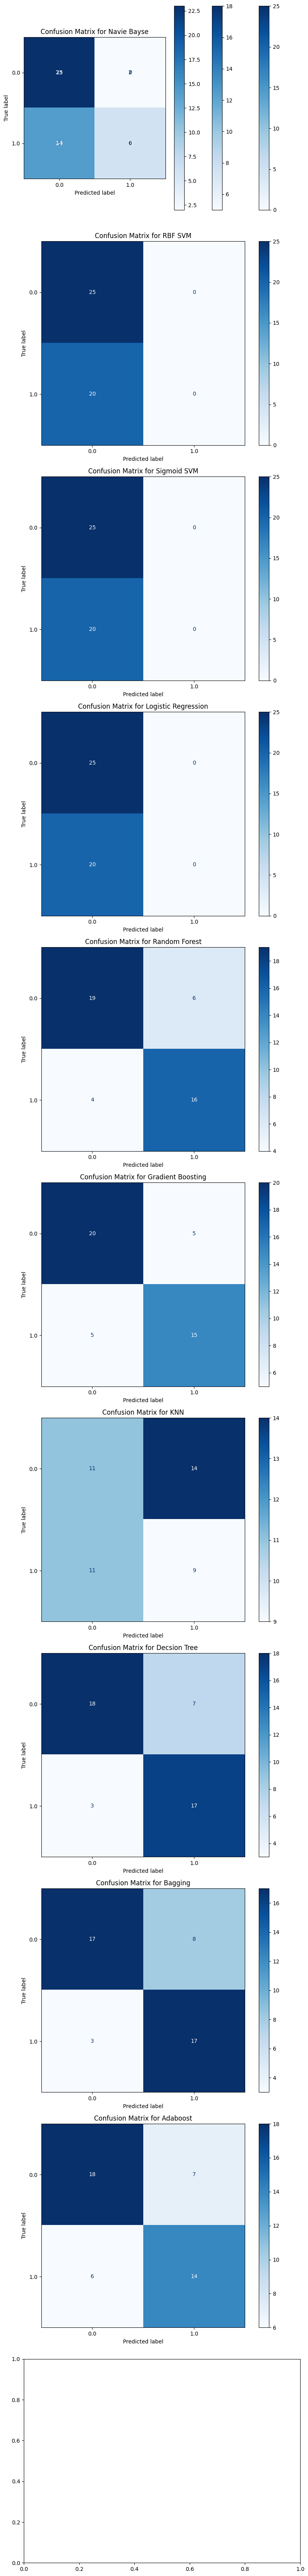

                  Model  Accuracy  Precision    Recall        F1
0              Poly SVM  0.555556   1.000000  0.000000  0.000000
1               RBF SVM  0.555556   1.000000  0.000000  0.000000
2           Sigmoid SVM  0.555556   1.000000  0.000000  0.000000
3   Logistic Regression  0.555556   1.000000  0.000000  0.000000
4         Random Forest  0.777778   0.727273  0.800000  0.761905
5     Gradient Boosting  0.777778   0.750000  0.750000  0.750000
6                   KNN  0.444444   0.391304  0.450000  0.418605
7          Decsion Tree  0.777778   0.708333  0.850000  0.772727
8               Bagging  0.755556   0.680000  0.850000  0.755556
9              Adaboost  0.711111   0.666667  0.700000  0.682927
10           Linear SVM  0.733333   0.720000  0.782609  0.750000
11          Navie Bayse  0.644444   0.750000  0.300000  0.428571


In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.sparse import csr_matrix
# Define the scaled models
modelsScaled = {
    "Linear SVM": svm_A_liner
}

# Define the unscaled models
models = {
    "Poly SVM": svm_A_poly,
    "RBF SVM": svm_A_rbf,
    "Sigmoid SVM" : svm_A_sig,
    "Logistic Regression": log_A,
    "Random Forest": randF_A,
    "Gradient Boosting": gbc_A,
    "KNN": knn,
    "Decsion Tree" : dt_clf,
    "Bagging" : bag_dt,
    "Adaboost" : ada_dt,
    #"Voting" : vote,
    #"Navie Bayse" : bayes
}

bModels = {
    "Navie Bayse" : bayes
}

# Function to plot confusion matrix for each model
def plot_confusion_matrix(model, X, y, title):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    ax.set_title(title)

# Function to print classification report and collect metrics
def print_classification_report_and_collect_metrics(model, X, y, name):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    ps = precision_score(y, y_pred, zero_division=1)
    recall = recall_score(y, y_pred, zero_division=1)
    f1 = f1_score(y, y_pred, zero_division=1)
    report = classification_report(y, y_pred, zero_division=1)
    print(f"Classification Report for {name}:")
    print(report)
    metrics_list.append({'Model': name, 'Accuracy': acc, 'Precision': ps, 'Recall': recall, 'F1': f1})


# Create subplots
fig, axs = plt.subplots(nrows=len(modelsScaled) + len(models), ncols=1, figsize=(8, 6*(len(modelsScaled) + len(models))))
metrics_list = []

# Plot confusion matrices and print classification report for unscaled models
for idx, (name, model) in enumerate(models.items()):
    ax = axs[idx]
    plot_confusion_matrix(model, X_test, y_test, f"Confusion Matrix for {name}")
    print_classification_report_and_collect_metrics(model, X_test, y_test, name)

# Plot confusion matrices and print classification report for scaled models
for idx, (name, model) in enumerate(modelsScaled.items()):
    ax = axs[idx]
    plot_confusion_matrix(model, X_testS, y_testS, f"Confusion Matrix for {name}")
    print_classification_report_and_collect_metrics(model, X_testS, y_testS, name)
    
for idx, (name, model) in enumerate(bModels.items()):
    ax = axs[idx]
    plot_confusion_matrix(model, X_test.toarray(), y_test, f"Confusion Matrix for {name}")
    print_classification_report_and_collect_metrics(model, X_test.toarray(), y_test, name)

plt.tight_layout()
plt.show()

metrics_df = pandas.DataFrame(metrics_list)
print(metrics_df)

# Save the metrics table to a file
metrics_df.to_csv('model_metricsB1.csv', index=False)


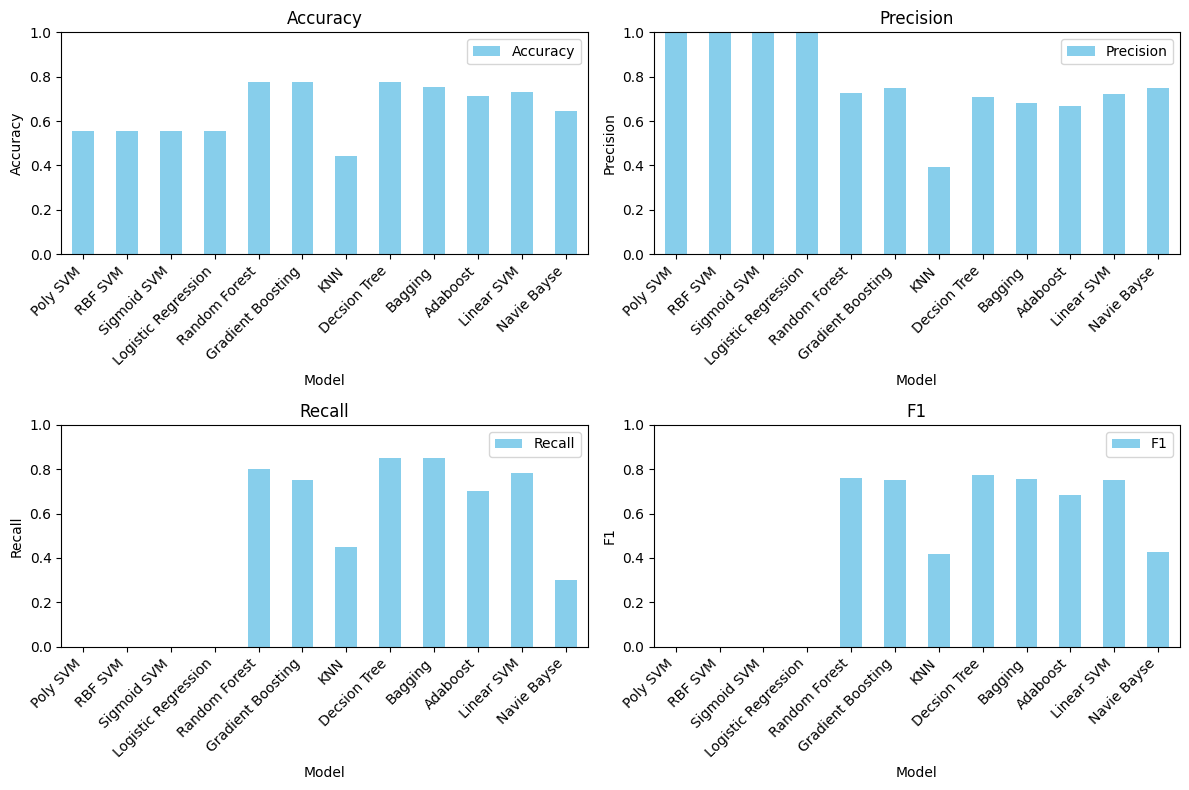

In [19]:
metrics_df = pandas.DataFrame(metrics_list)

# Plot bar charts for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1']
for i, metric in enumerate(metrics_to_plot):
    ax = axes[i // 2, i % 2]
    metrics_df.plot(kind='bar', x='Model', y=metric, ax=ax, color='skyblue')
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    ax.set_xticklabels(metrics_df['Model'], rotation=45, ha='right')
    ax.set_ylim(0, 1)
    
    max_value = 1
    for p in ax.patches:
        percentage = p.get_height() / max_value * 100

plt.tight_layout()
plt.show()

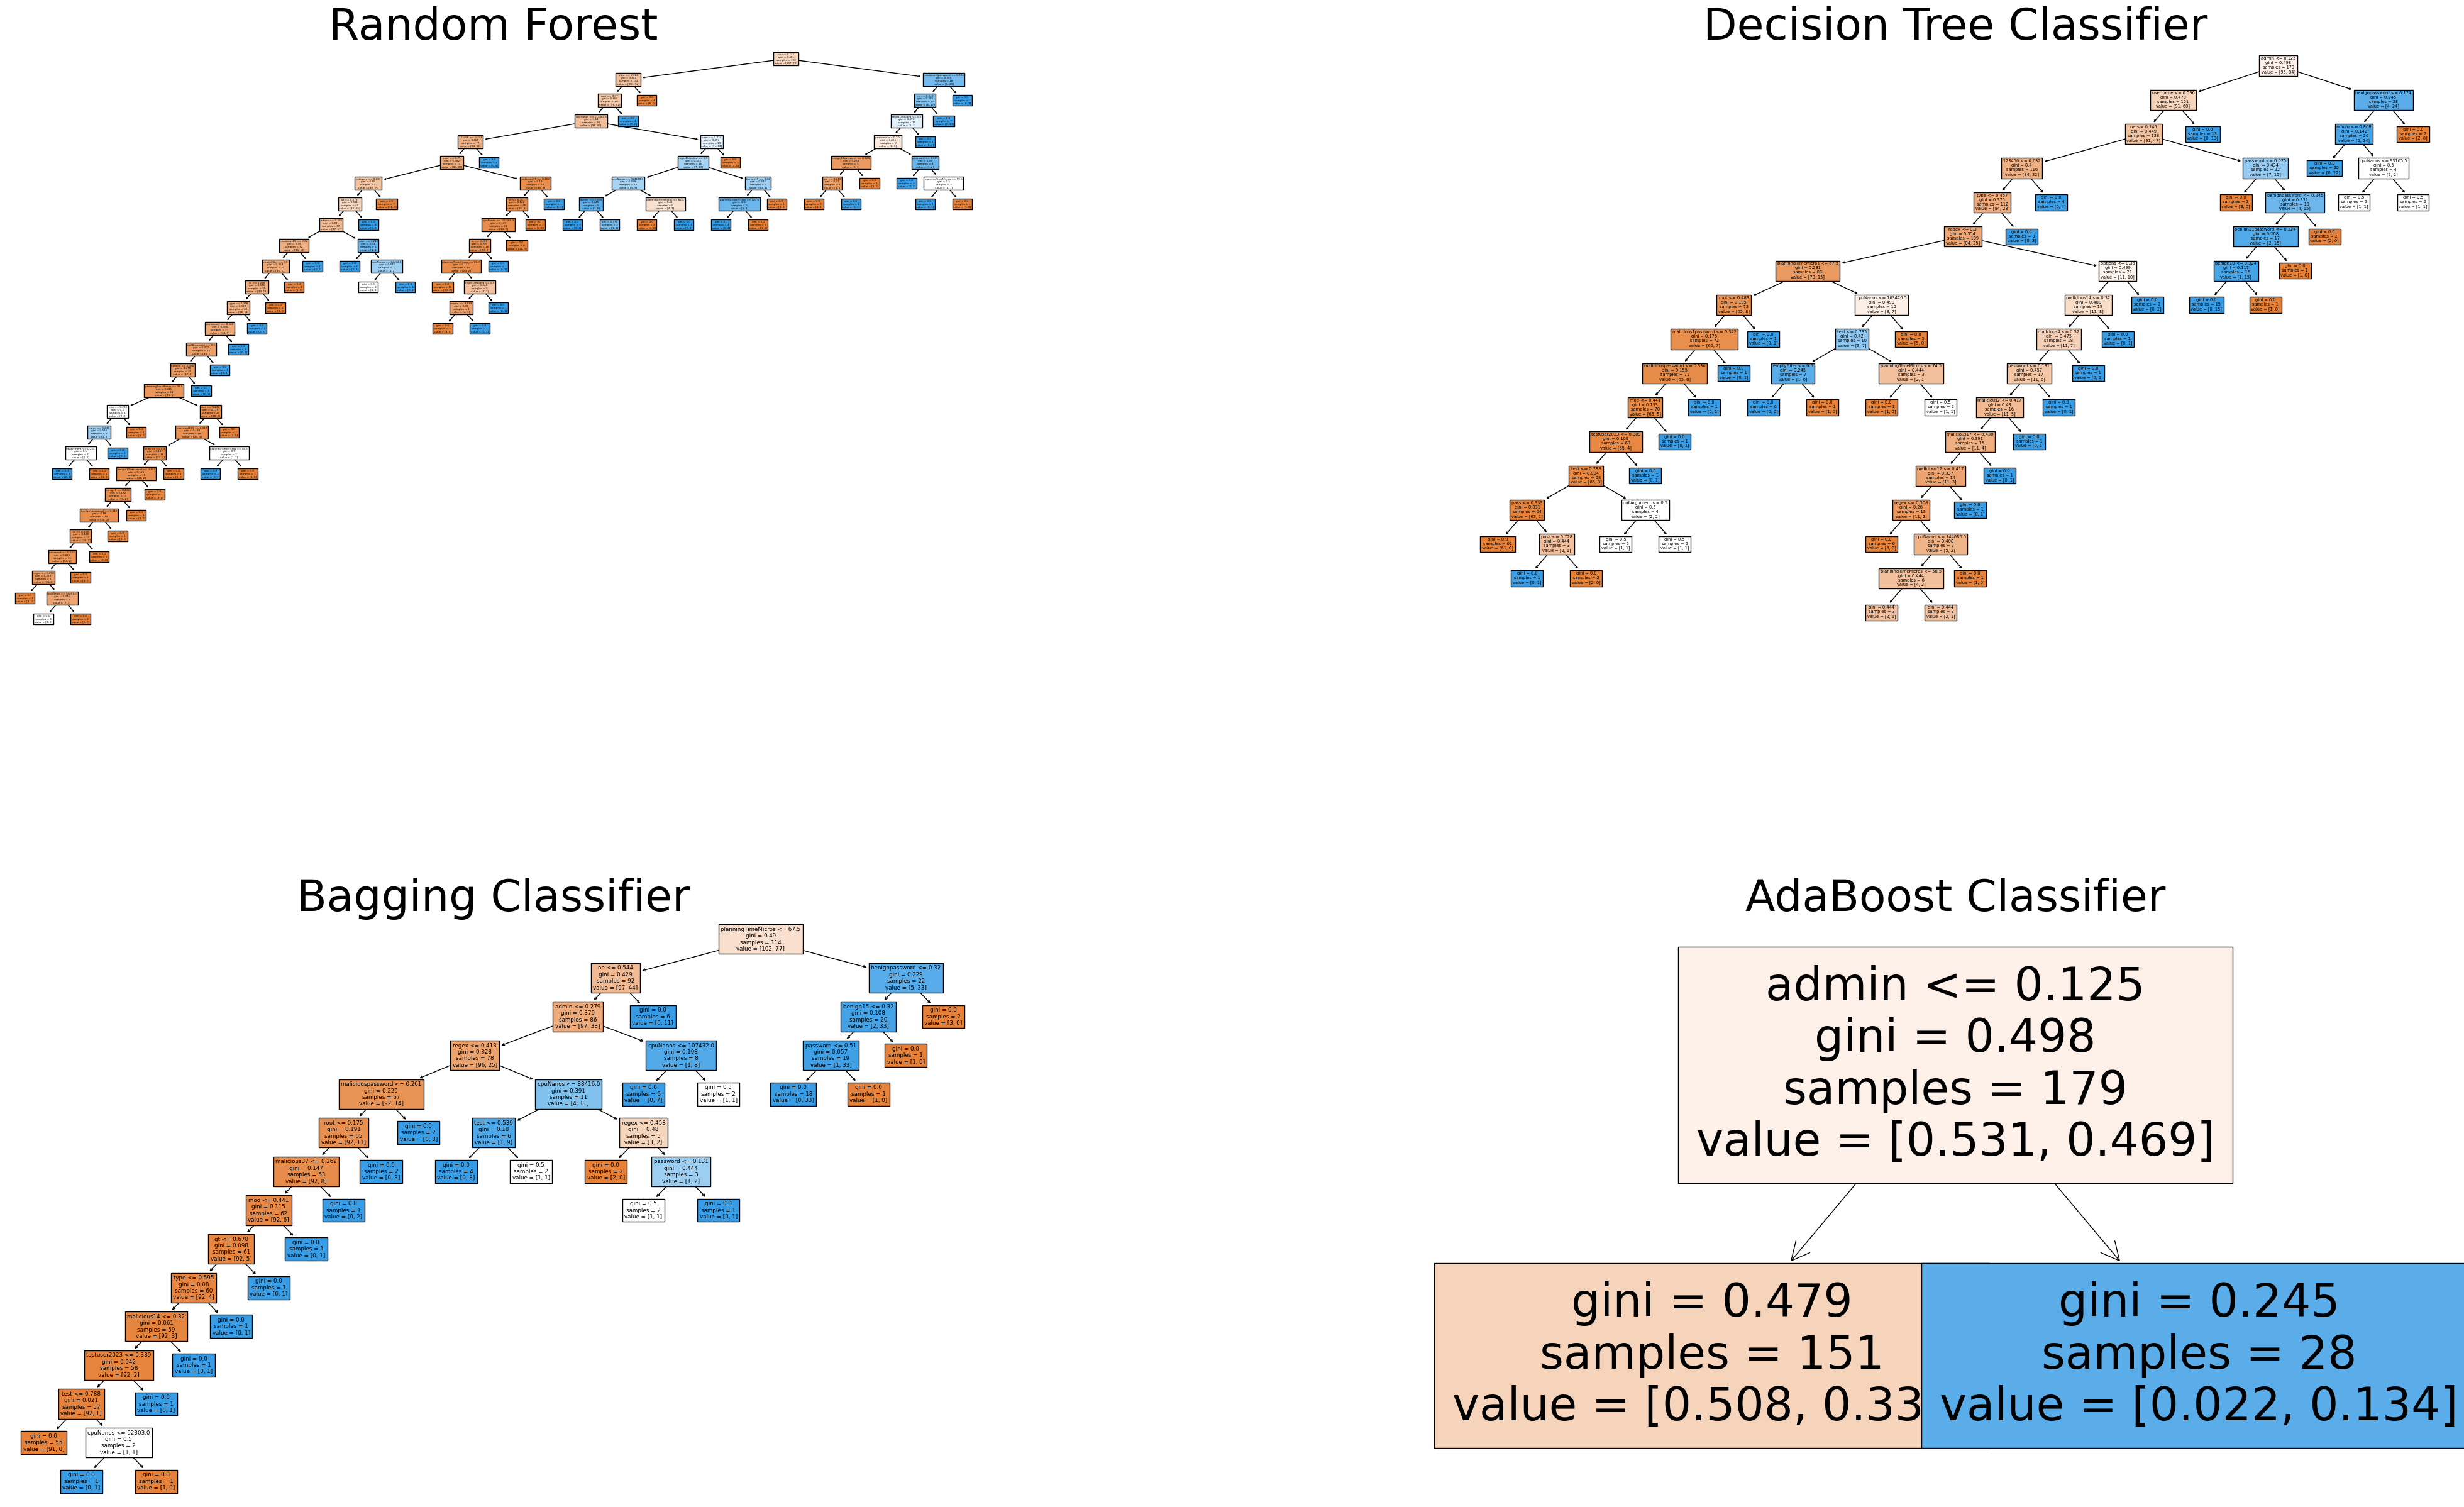

In [21]:
vectorized_feature_names = vectorizer.get_feature_names_out()

# Combined feature names
combined_feature_names = np.concatenate((vectorized_feature_names, ['ipHash','port','emptyFilter','regexDetected','whereDetected','nullArgument','logicOperator','planningTimeMicros','cpuNanos']))
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(50, 30))

# Plot the first decision tree
plot_tree(randF_A.estimators_[0], ax=axes[0, 0], filled=True, feature_names=combined_feature_names)
axes[0, 0].set_title('Random Forest', fontsize=50)

# Plot the second decision tree
plot_tree(dt_clf, ax=axes[0, 1], filled=True, feature_names=combined_feature_names)
axes[0, 1].set_title('Decision Tree Classifier', fontsize=50)

# Plot the third decision tree
plot_tree(bag_dt.estimators_[0], ax=axes[1, 0], filled=True, feature_names=combined_feature_names)
axes[1, 0].set_title('Bagging Classifier', fontsize=50)

# Plot the fourth decision tree
plot_tree(ada_dt.estimators_[0], ax=axes[1, 1], filled=True, feature_names=combined_feature_names)
axes[1, 1].set_title('AdaBoost Classifier', fontsize=50)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Display the figure
plt.show()

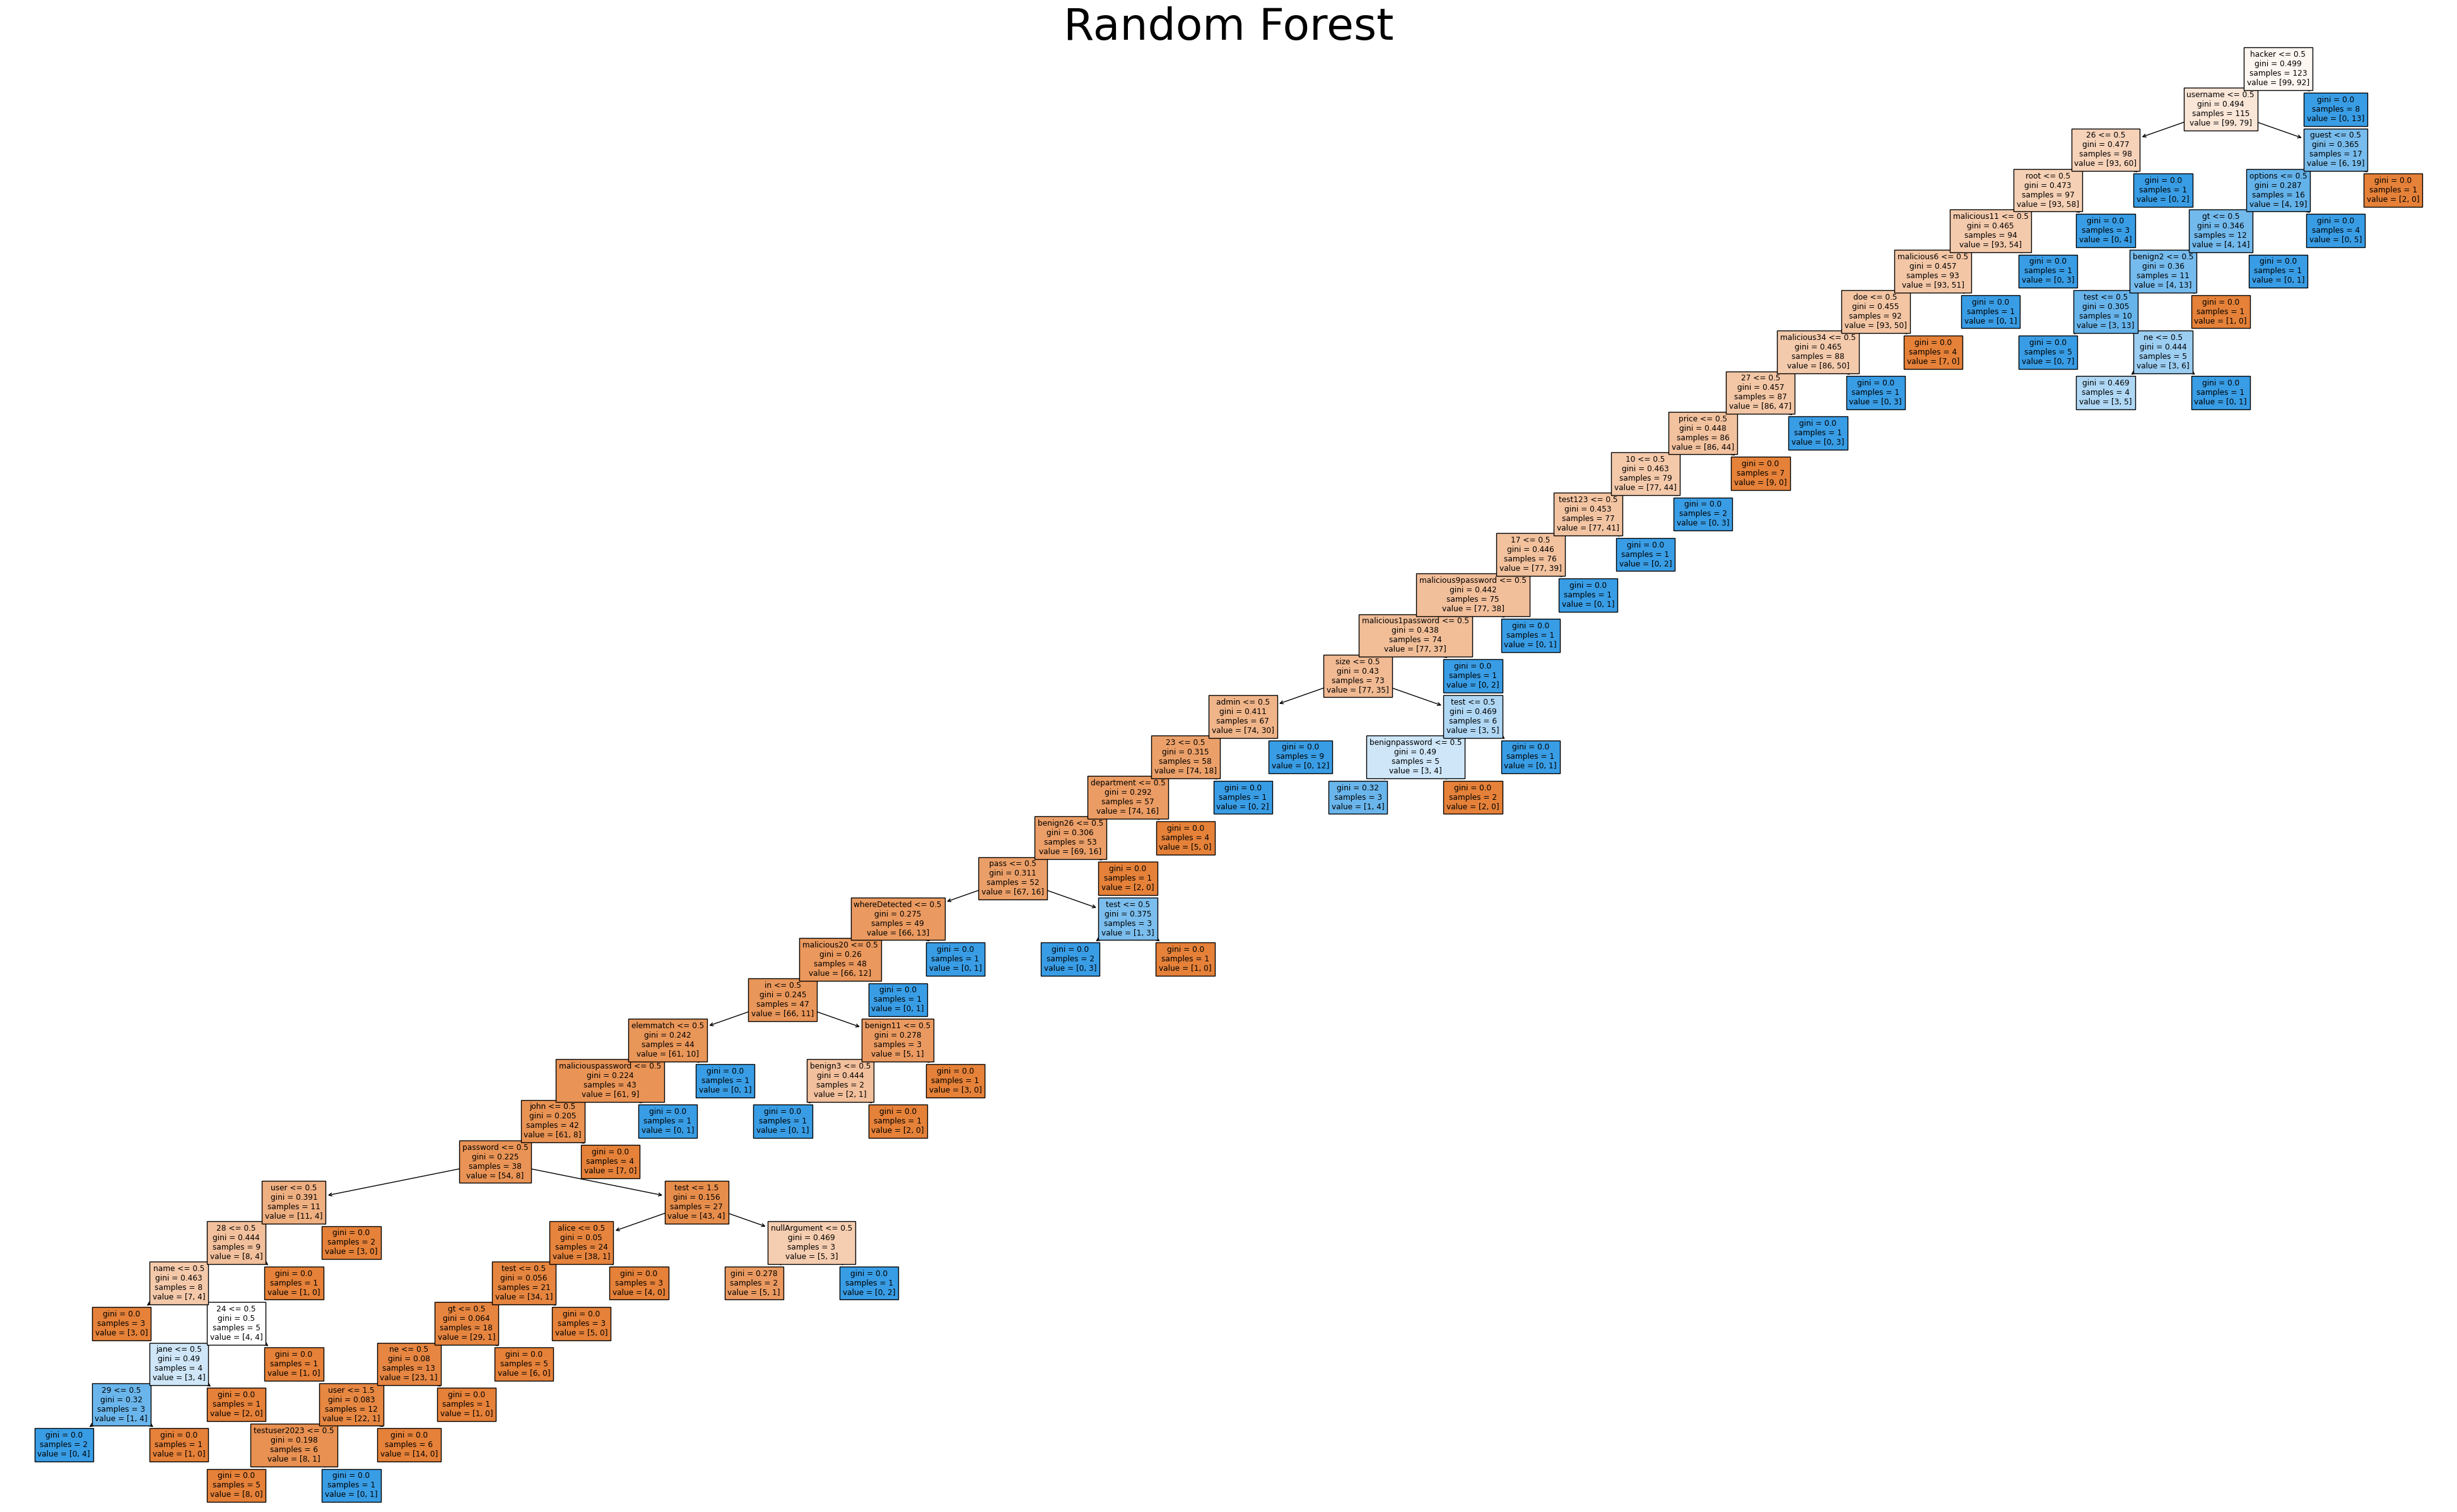

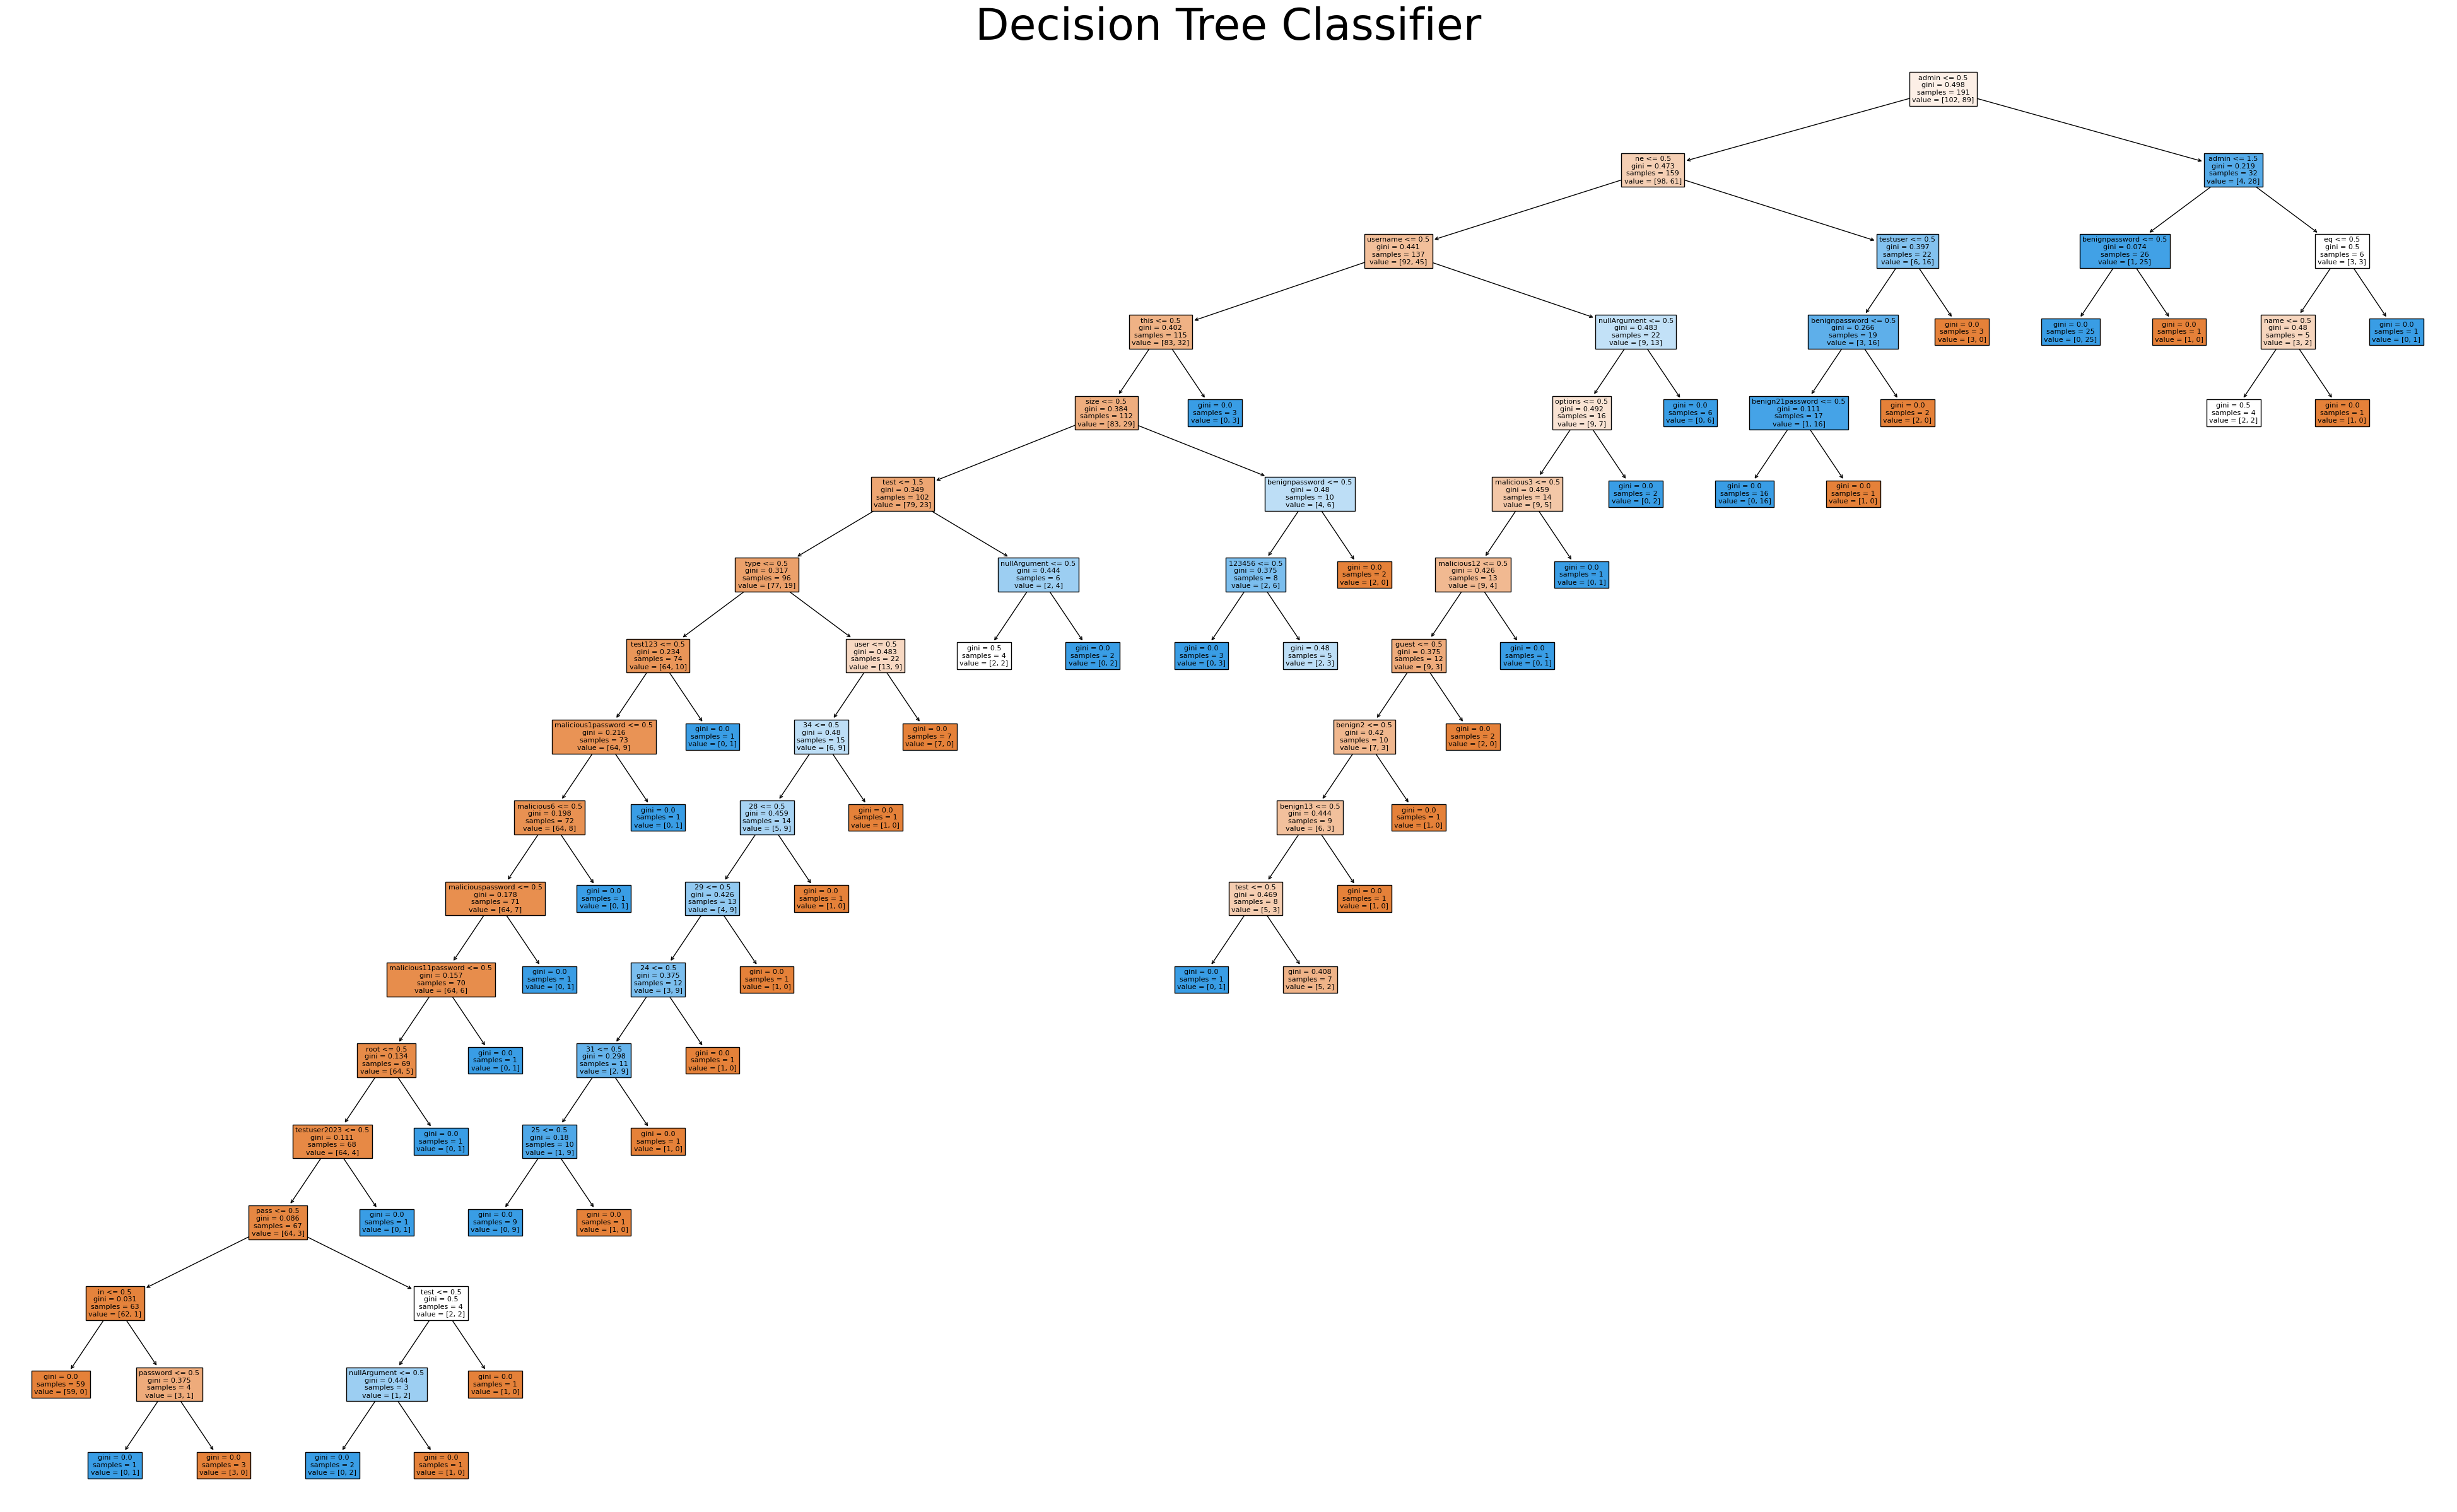

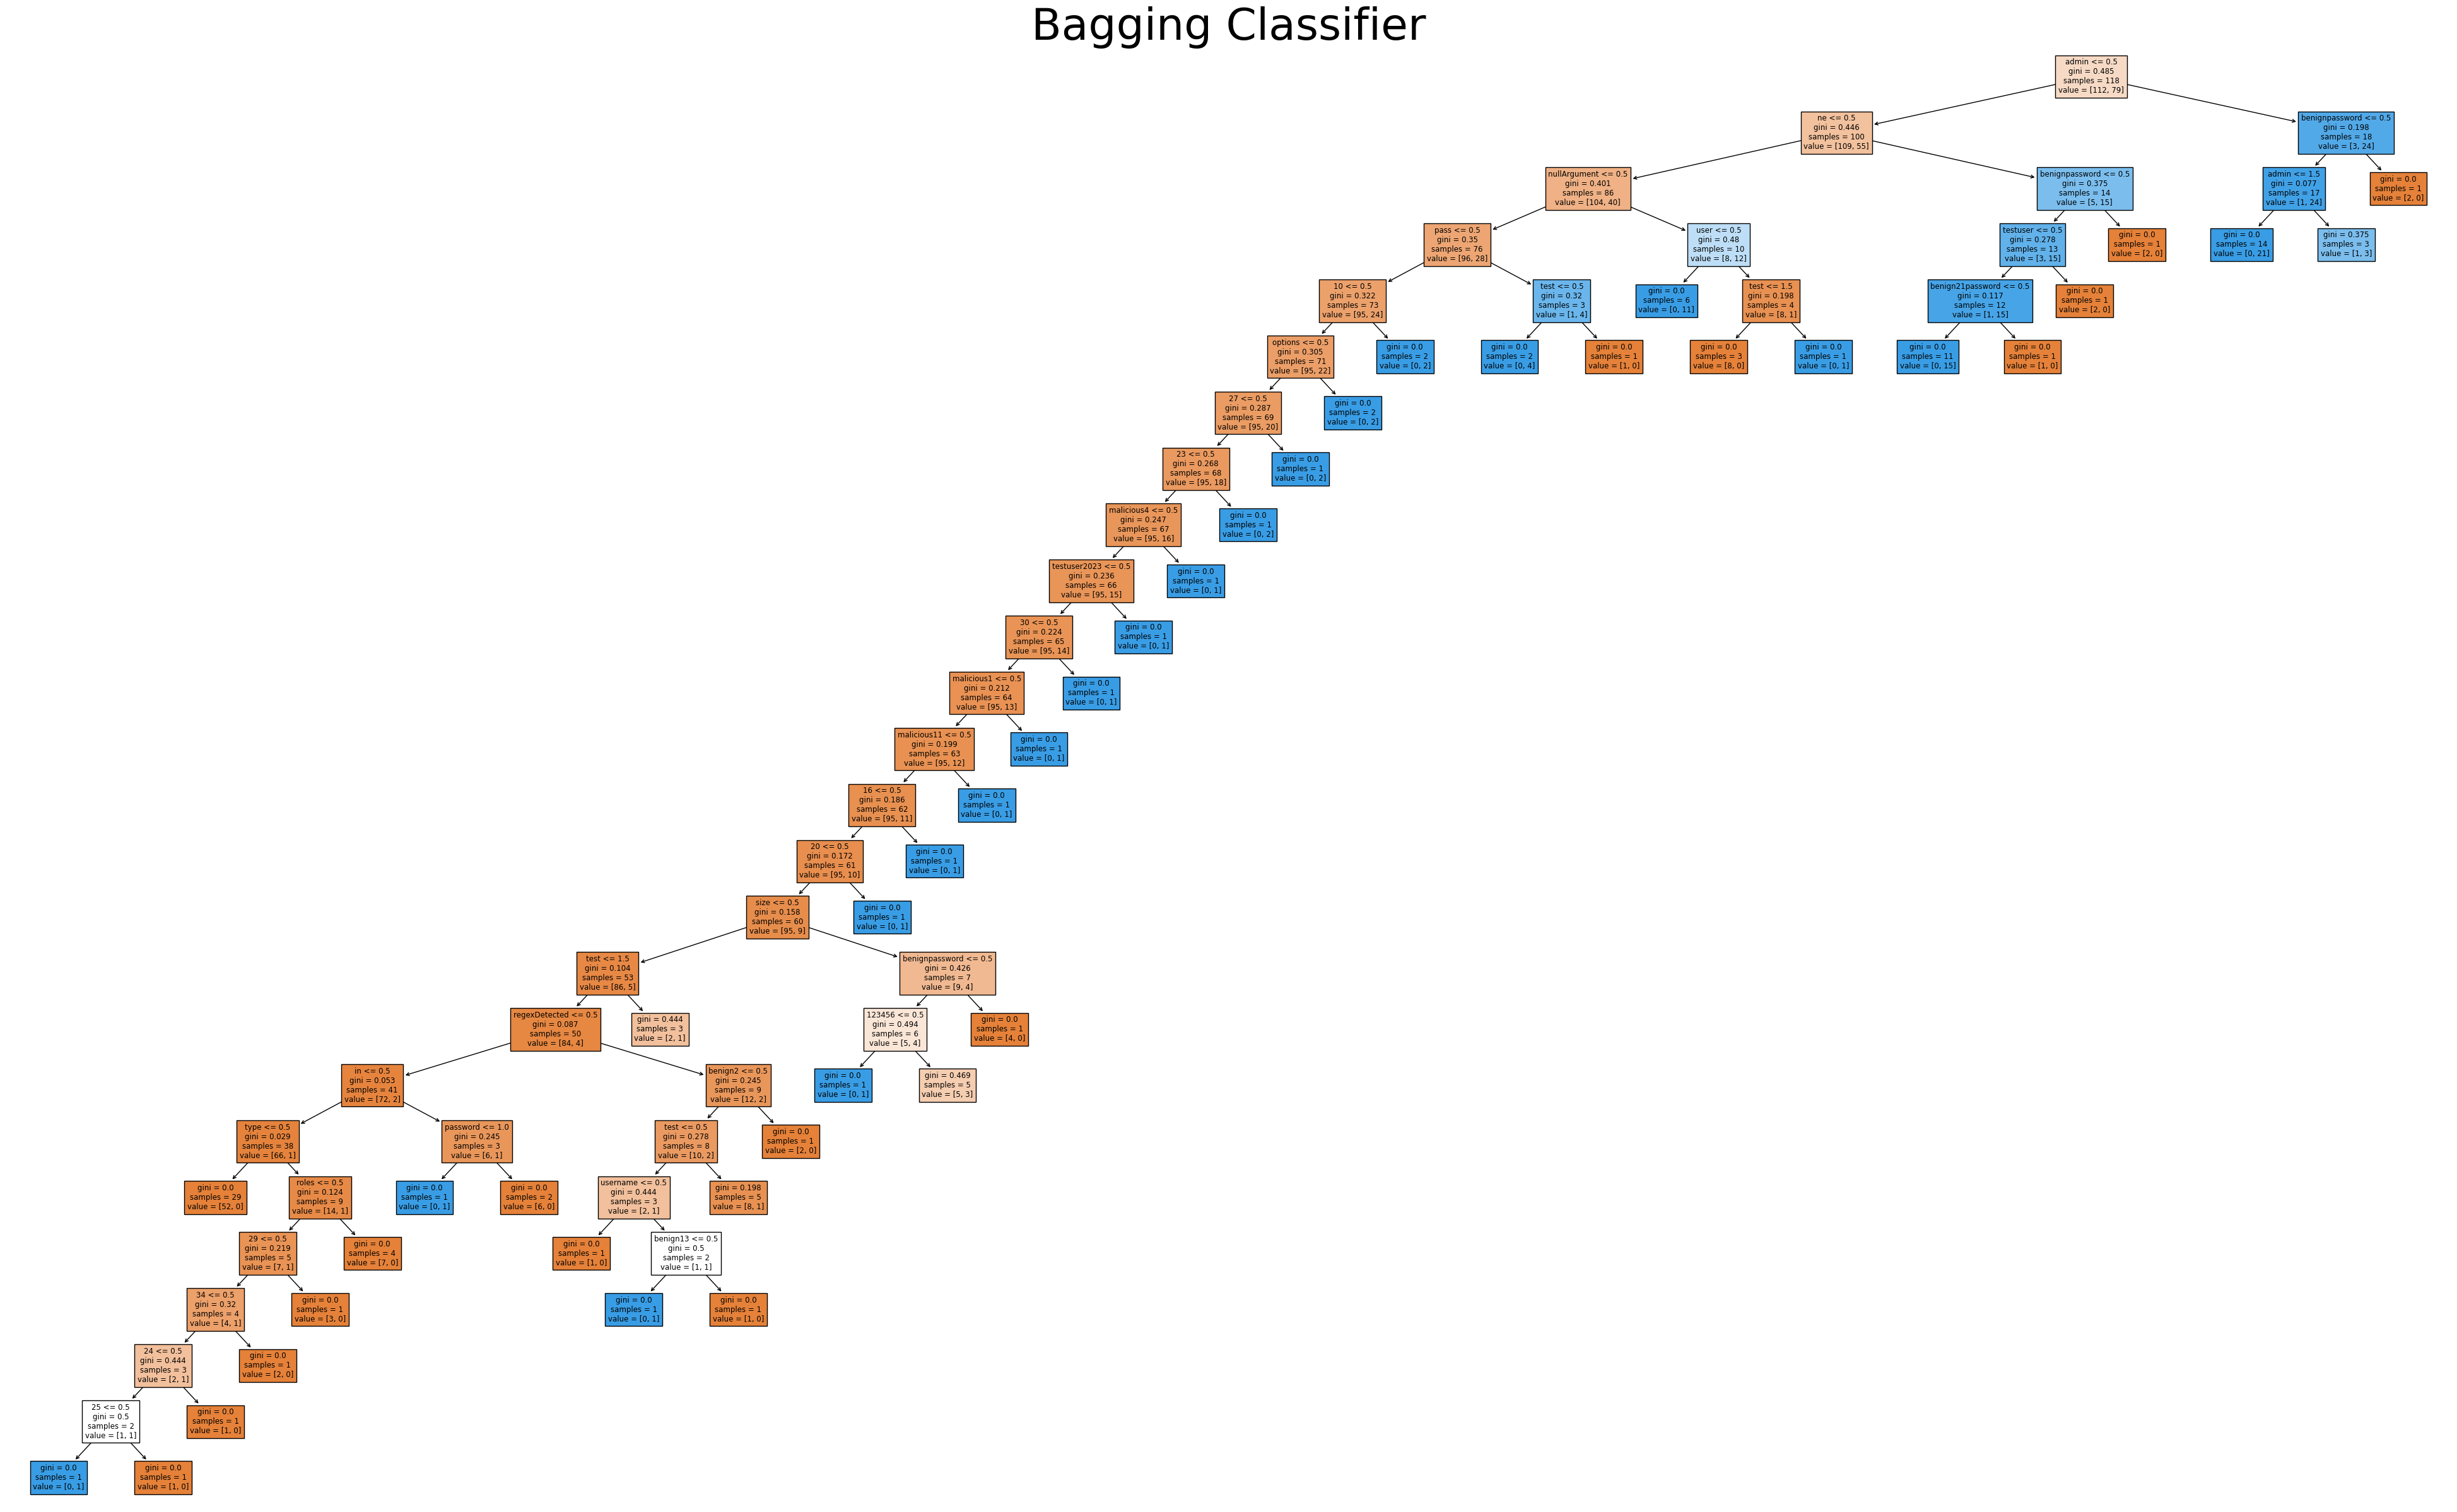

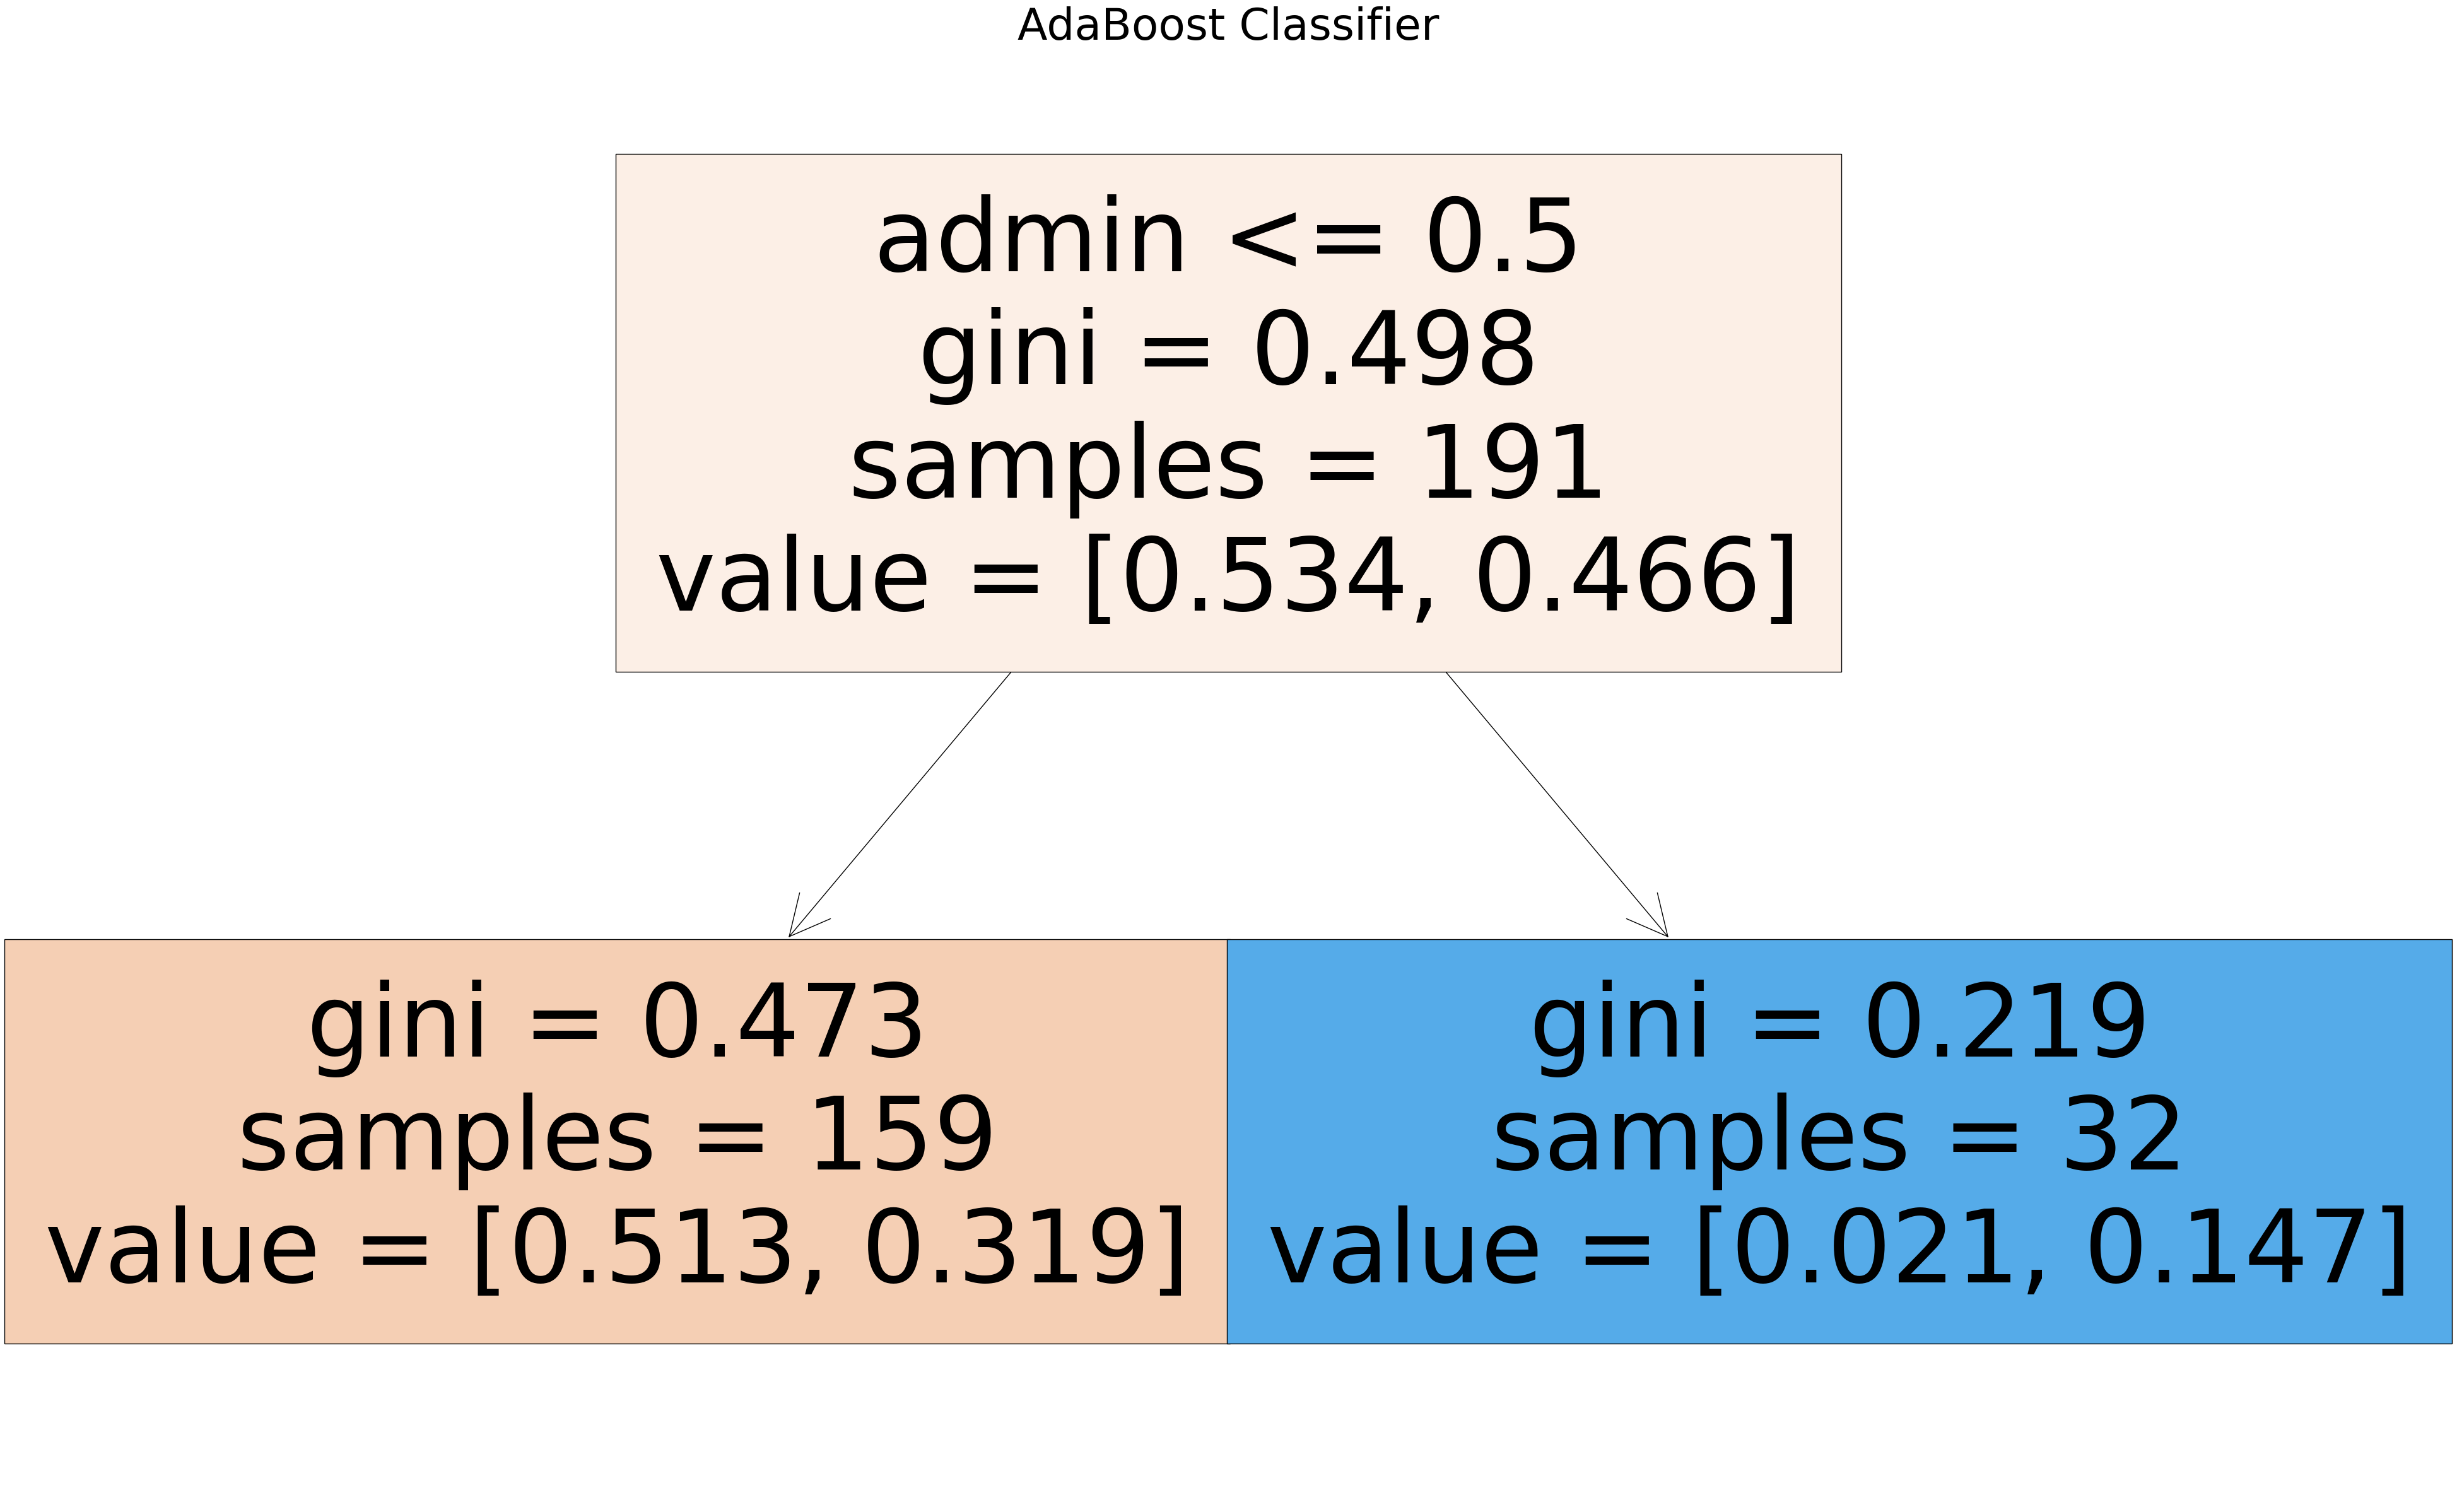

In [ ]:
plt.figure(figsize=(50, 30))
plot_tree(randF_A.estimators_[0], filled=True, feature_names=combined_feature_names)
plt.title('Random Forest', fontsize=50)
plt.show()

# Plot the second decision tree
plt.figure(figsize=(50, 30))
plot_tree(dt_clf, filled=True, feature_names=combined_feature_names)
plt.title('Decision Tree Classifier', fontsize=50)
plt.show()

# Plot the third decision tree
plt.figure(figsize=(50, 30))
plot_tree(bag_dt.estimators_[0], filled=True, feature_names=combined_feature_names)
plt.title('Bagging Classifier', fontsize=50)
plt.show()

# Plot the fourth decision tree
plt.figure(figsize=(50, 30))
plot_tree(ada_dt.estimators_[0], filled=True, feature_names=combined_feature_names)
plt.title('AdaBoost Classifier', fontsize=50)
plt.show()